# Project 1 - Statistical Inference (DIZON, TANG, TEE)
In this notebook, we will be exploring on the data from **MyAnimeList** which consists of anime-related data. We will be focusing on analyzing statistical-related inferences.

## numpy, pandas, and matplotlib
To start, we will be first importing the libraries that will be used to help us analyze the given data. The following libraries will be used:

1.   **Numpy**
2.   **Pandas**
3.  **Matplotlib**
4. **SciPy**


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as sp


## The Dataset
Next, we will be moving on to importing anime_list csv file. This will be the dataset that we will be working on. It contains over 23 variables (columns) and 18,162 observations (rows). Some of the variables will be ommitted from what we will be analyzing.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/gavindizon/CSMODEL/main/Project%201%20-%20Statistical%20Inference/csv/anime_list.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18162 entries, 0 to 18161
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mal_id      18162 non-null  int64  
 1   title       18162 non-null  object 
 2   synopsis    18162 non-null  object 
 3   background  18162 non-null  object 
 4   aired       18162 non-null  object 
 5   airing      18162 non-null  int64  
 6   duration    18162 non-null  object 
 7   episodes    18162 non-null  int64  
 8   type        18162 non-null  object 
 9   favorites   18162 non-null  int64  
 10  members     18162 non-null  int64  
 11  rank        18162 non-null  float64
 12  popularity  18162 non-null  int64  
 13  score       18162 non-null  float64
 14  scored_by   18162 non-null  int64  
 15  rating      18162 non-null  object 
 16  premiered   18162 non-null  object 
 17  genres      18095 non-null  object 
 18  related     18162 non-null  object 
 19  status      18162 non-nul

## Data Cleaning

Before analyzing the data, we will first clean the data. Here, we will remove the uneeded variables and variables with null values. Although, some of the variables that have null values but with the proper context (e.g. Not Applicable) will be represented with a uniform sentinel value (`-` for an object/ string and `-1` for a number) instead of removing the whole column.

In addition, since our analysis will be focusing on `TV` and `Movie` types we will be removing other types of Anime such as `OVA` and `ONA`.

In [4]:
df_cleaned = df.drop(['background', 'mal_id', 'synopsis', 'related'], 1)
#Convert raw data types to their necessary datatypes
df_cleaned['rank'] = df_cleaned['rank'].astype(int)
df_cleaned = df_cleaned.dropna(subset= ['genres'], how= 'any')

#Remove unnecessary part of dataset
df_cleaned = df_cleaned[(df_cleaned['type'] == 'TV') | (df_cleaned['type'] == 'Movie')]
#OVA, ONA

df_cleaned = df_cleaned.reset_index()

### Checking for Possible Duplicates

Another thing that we could do is to check for possible duplicates, and we either merge these together or drop the others from the dataset depending on the context. In this dataset, there is one duplicate title found which is `Maou Gakuin no Futekigousha: Shijou Saikyou no Maou no Shiso, Tensei shite Shison-tachi no Gakkou e`. In the case of the duplicate, it can be seen below that one observation mostly consists of sentinel values. This just means that this observation is merely a duplicate thus we only need to remove it.

In [5]:
df_cleaned['title'].value_counts()

Maou Gakuin no Futekigousha: Shijou Saikyou no Maou no Shiso, Tensei shite Shison-tachi no Gakkou e    2
Initial D First Stage                                                                                  1
Hakken Taiken Daisuki! Shimajirou                                                                      1
Shakunetsu Kabaddi                                                                                     1
San Ge Heshang                                                                                         1
                                                                                                      ..
Overlord Movie: Manner Movie                                                                           1
Leonardo Hakase to Kirin-mura no Nakama-tachi (TV)                                                     1
Mahou Shoujo Tokushusen Asuka                                                                          1
Biriken Nandemo Shoukai                                

In [6]:
df_cleaned.loc[df_cleaned['title'] == 'Maou Gakuin no Futekigousha: Shijou Saikyou no Maou no Shiso, Tensei shite Shison-tachi no Gakkou e' ]

,index,title,aired,airing,duration,episodes,type,favorites,members,rank,popularity,score,scored_by,rating,premiered,genres,status,licensors,producers,studios
7470,16175,Maou Gakuin no Futekigousha: Shijou Saikyou no...,"Jul 4, 2020 to Sep 26, 2020",0,23 min per ep,13,TV,3066,437602,2188,343,7.34,245721,R - 17+ (violence & profanity),Summer 2020,"Action, Demons, Magic, Fantasy, School",Finished Airing,Aniplex of America,"Aniplex, Kadokawa",SILVER LINK.
8269,17966,Maou Gakuin no Futekigousha: Shijou Saikyou no...,Not available,0,Unknown,-1,TV,100,18366,-1,3980,-1.00,-1,R - 17+ (violence & profanity),-,"Action, Demons, Magic, Fantasy, School",Not yet aired,-,Aniplex,SILVER LINK.


In [7]:
df_cleaned = df_cleaned.drop(df_cleaned.index[8269])
df_cleaned = df_cleaned.reset_index()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8342 entries, 0 to 8341
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   level_0     8342 non-null   int64  
 1   index       8342 non-null   int64  
 2   title       8342 non-null   object 
 3   aired       8342 non-null   object 
 4   airing      8342 non-null   int64  
 5   duration    8342 non-null   object 
 6   episodes    8342 non-null   int64  
 7   type        8342 non-null   object 
 8   favorites   8342 non-null   int64  
 9   members     8342 non-null   int64  
 10  rank        8342 non-null   int64  
 11  popularity  8342 non-null   int64  
 12  score       8342 non-null   float64
 13  scored_by   8342 non-null   int64  
 14  rating      8342 non-null   object 
 15  premiered   8342 non-null   object 
 16  genres      8342 non-null   object 
 17  status      8342 non-null   object 
 18  licensors   8342 non-null   object 
 19  producers   8342 non-null  

In [8]:
df_cleaned['rating'].unique()

array(['R - 17+ (violence & profanity)', 'PG-13 - Teens 13 or older',
       'PG - Children', 'R+ - Mild Nudity', 'G - All Ages', 'None',
       'Rx - Hentai'], dtype=object)

## Exploratory Data Analysis

After the data was cleaned, we proceed now to analyzing it. Since the dataset was created for a recommendation system, we will be exploring possible correlations between the presented variables. Primarily, we will be focusing on three things which are the ff:

1. Do the score significantly differ dependeing on the age_group (`rating`)? 
2. Is there a correlation between the number of favorites of an anime to it's score?
3. Do the number of episodes in anime affect how popular it is?

# 1. Do the score significantly differ dependeing on the age_group (`rating`)? 

To start, we will be exploring the correlation between the rating and the score. In the data given, there are 7 kinds of rating. 
- None
- G - All Ages
- PG - Children
- PG - Teens 13 or older
- R - 17+ (violence & profanity)
- R+ - Mild Nudity
- Rx - Hentai

## Further Data Preprocessing

We will be excluding the `None` type of rating in this analysis since we would be exploring only the rated types. Likewise, we will be grouping the observations based on their ratings.

In [9]:
#creates a dataframe that excludes the None Rating Type and Sentinel Value Rows from score
df_eda1 = df_cleaned.loc[(df_cleaned['rating'] != 'None') & (df_cleaned['score'] > -1.0)]


df_eda1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5935 entries, 0 to 8161
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   level_0     5935 non-null   int64  
 1   index       5935 non-null   int64  
 2   title       5935 non-null   object 
 3   aired       5935 non-null   object 
 4   airing      5935 non-null   int64  
 5   duration    5935 non-null   object 
 6   episodes    5935 non-null   int64  
 7   type        5935 non-null   object 
 8   favorites   5935 non-null   int64  
 9   members     5935 non-null   int64  
 10  rank        5935 non-null   int64  
 11  popularity  5935 non-null   int64  
 12  score       5935 non-null   float64
 13  scored_by   5935 non-null   int64  
 14  rating      5935 non-null   object 
 15  premiered   5935 non-null   object 
 16  genres      5935 non-null   object 
 17  status      5935 non-null   object 
 18  licensors   5935 non-null   object 
 19  producers   5935 non-null  

## Numerical Summaries

Here, we will be looking for the measure of central tendencies, dispersion, and possible correlation between the rating and the score.

In [10]:
df_eda1_num = df_eda1.groupby('rating').agg({'score': ["mean", "median", "std", lambda x:x.value_counts().index[0]]})
df_eda1_num.rename(columns={'<lambda_0>': 'mode'}, inplace=True)
df_eda1_num

score                       
                                    mean median       std  mode
rating                                                         
G - All Ages                    6.198567  6.230  0.857516  6.68
PG - Children                   6.566311  6.600  0.676875  6.39
PG-13 - Teens 13 or older       6.952306  7.020  0.827165  7.04
R - 17+ (violence & profanity)  7.237803  7.330  0.860957  7.26
R+ - Mild Nudity                6.522184  6.635  1.039909  6.44
Rx - Hentai                     5.725000  5.760  0.941483  5.91

To check for the possible correlation between the rating and the average score, we will be representing the ratings through a numerical value with `0` being the lowest which will be represented by the `G - All Ages` and `5` being the highest which will be represented by `Rx - Hentai`

In [11]:
df_eda1corr = (df_eda1_num.reset_index()).rename(columns={'': 'rating'}).reset_index().rename(columns={'': "num_value"})

df_eda1corr['index']['num_value'].corr(df_eda1corr['score']['mean'])

-0.2207063311724617

### Observation

It can be seen that there is a negatively very weak correlation between the rating and the scores. This means that there is a very weak relationship where in as the rating is intended for higher-aged audience the more the score will dip.

## Visualization

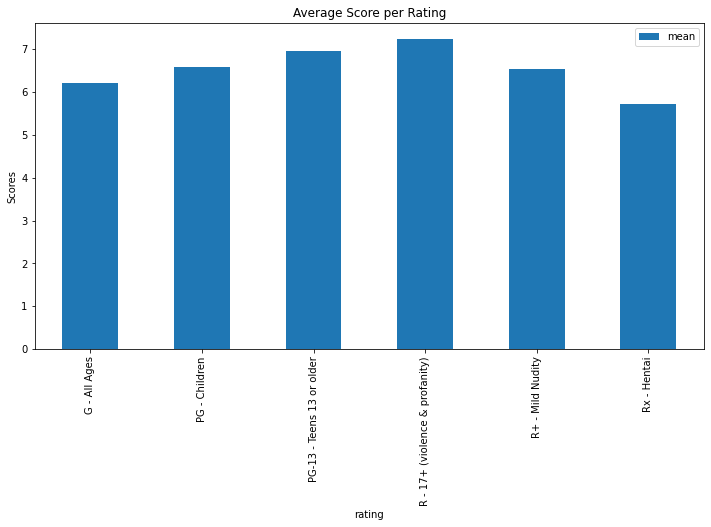

In [12]:
df_eda1_viz = df_eda1corr
df_eda1_viz.columns = df_eda1corr.columns.droplevel()

viz_eda1 = df_eda1_viz.plot.bar(figsize=(12,6), x='rating', y='mean')
viz_eda1.set_title("Average Score per Rating")
viz_eda1.set_ylabel('Scores')
plt.show()


### Observation
It can be seen that the rating with the highest average in terms of score is the `R-17+ (Violence & Profanity)` rating attaining `7.23`. It was then followed by `PG-13 - Teens 13 or older` and `PG-Children` attaining an average of `6.95` and `6.59` respectively. The lowest scored ratings are `Rx - Hentai`, `R+ - Mild Nudity`, and `G - All Ages` which got `5.73`, `6.20`, and `6.52` respectively.

# 2. Is there a correlation between the number of favorites of an anime to its score?

The next EDA that we want to analyze whether there is a possible correlation between the number of times an anime is favorited with regards to the score.

## Further Data Preprocessing

For that, we first check whether there are null/ sentinel values for the columns of `score` and `favorites`.


In [13]:
df_eda2 = df_cleaned[['score', 'favorites']]
df_eda2

,score,favorites
0,8.77,59968
1,8.39,1063
2,8.23,11882
3,7.27,512
4,6.97,10
...,...,...
8337,-1.00,22
8338,-1.00,611
8339,-1.00,1
8340,-1.00,0


In [14]:
df_eda2 = df_eda2.drop(df_eda2[df_eda2['score'] == -1.00].index)
df_eda2 = df_eda2.drop(df_eda2[df_eda2['favorites'] == 0].index)
df_eda2.value_counts("favorites")

favorites
1       391
2       291
3       228
4       156
5       154
       ... 
2309      1
2316      1
2328      1
2351      1
1094      1
Length: 1447, dtype: int64

## Removing Outliers and Computing for the Correlation

Now, we remove possible outliers so that our analysis will not be influenced by it. Afterwhich, we compute for the correlation between the scores and the number of ratings.

In [15]:
z_scores = np.abs(sp.stats.zscore(df_eda2))

filtered_entries = (z_scores < 3).all(axis=1)
new_df = df_eda2[filtered_entries]

new_df


,score,favorites
1,8.39,1063
2,8.23,11882
3,7.27,512
4,6.97,10
5,7.94,1770
...,...,...
8156,6.17,119
8158,6.97,32
8159,5.97,278
8161,5.49,62


### 

In [16]:
new_df['favorites'].corr(new_df['score'])

0.4098869654408735

### Observation

As we can see, there is a positive weak correlation between the number of favorites gained by the anime and its average score. We then visualize the result through a scatterplot

## Visualization

<AxesSubplot:xlabel='favorites', ylabel='score'>

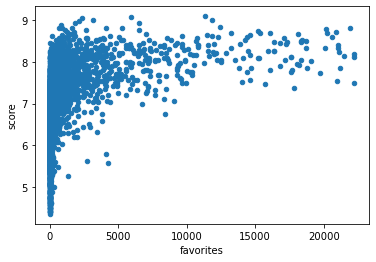

In [17]:
new_df.plot.scatter('favorites', 'score')

### Observation

As we can see, there is a positively weak correlation between the number of times at item is favorited `favorites` and the average `score` of a title.

# 3. Do the studios affect the anime's popularity?

# Research Question

1. Is there a significant difference between the `Kodakawa Animation` vs `Kyoto Animation` in terms of their average popularity?

    lorem ipsum
    
    .

2. Is there a significant difference on the average scores between the `type` `Movie` and `anime` in terms of their average scores (`score`) per different age group (`rating`)?

    Since the dataset is intended to be used as a basis of a recommendation system, identifying whether there is a difference between the scores of `TV` and `Movie` across different age groups is a necessity to determine whether it is logical to use the scores as the basis in cross-recommending an anime from a `Movie` type to a `TV` type with the same rating.


# Statistical Inference

For the first research question, we set up our hypotheses as follows:

$H_0$ (null hypothesis): There is no significant difference between the number of episodes in an anime and its popularity.

$H_A$ (alternative hypothesis): There is a significant difference between the number of episodes in an anime and its popularity.

In [73]:
#Dito Gian

For the second research question, we set up our hypotheses as follows:

$H_0$ (null hypothesis): There is no significant difference on the average scores between the `type` `Movie` and `anime` in terms of their average scores (`score`) per different age group (`rating`).

$H_A$ (alternative hypothesis): There is a significant difference on the average scores between the `type` `Movie` and `anime` in terms of their average scores (`score`) per different age group (`rating`)

In [55]:
df_eda1['type'].unique()

counts = (df_eda1.groupby(['type','rating'])).agg({'score': ["mean"]})
counts['score']['mean']['Movie']


rating
G - All Ages                      5.918290
PG - Children                     6.589375
PG-13 - Teens 13 or older         6.940393
R - 17+ (violence & profanity)    7.071818
R+ - Mild Nudity                  6.229160
Rx - Hentai                       5.725000
Name: mean, dtype: float64

In [71]:
table1 = pd.DataFrame([counts['score']['mean']['Movie'], counts['score']['mean']['TV']], index=["Movie", "TV"])
table1

,G - All Ages,PG - Children,PG-13 - Teens 13 or older,R - 17+ (violence & profanity),R+ - Mild Nudity,Rx - Hentai
Movie,5.918290,6.589375,6.940393,7.071818,6.229160,5.725
TV,6.570344,6.549096,6.956120,7.303425,6.655785,NaN


In [72]:
table1 = table1.drop(columns="Rx - Hentai")
table1 = table1.transpose()
table1

,Movie,TV
G - All Ages,5.918290,6.570344
PG - Children,6.589375,6.549096
PG-13 - Teens 13 or older,6.940393,6.956120
R - 17+ (violence & profanity),7.071818,7.303425
R+ - Mild Nudity,6.229160,6.655785


In [69]:
sp.chi2_contingency(table1)

(0.027300372901567373,
 0.9999076796830506,
 4,
 array([[6.12410021, 6.36453359],
        [6.44276353, 6.69570768],
        [6.81448738, 7.08202549],
        [7.04924421, 7.32599892],
        [6.31844094, 6.56650417]]))

### Observation

As we can see,from the obtained p - value, `0.999` from the chi test that there is no significant difference between the `TV` type and `Movie` type at any age group in any significance level. For this, we accept the null hypothesis that there is no significant difference on the average scores between the `type` `Movie` and `anime` in terms of their average scores (`score`) per different age group (`rating`).

# Inference and Conclusion

dito Sharlin